In [63]:
# Imports
import pandas as pd
#!pip install fbprophet
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Make all graphs in-line
%matplotlib inline

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


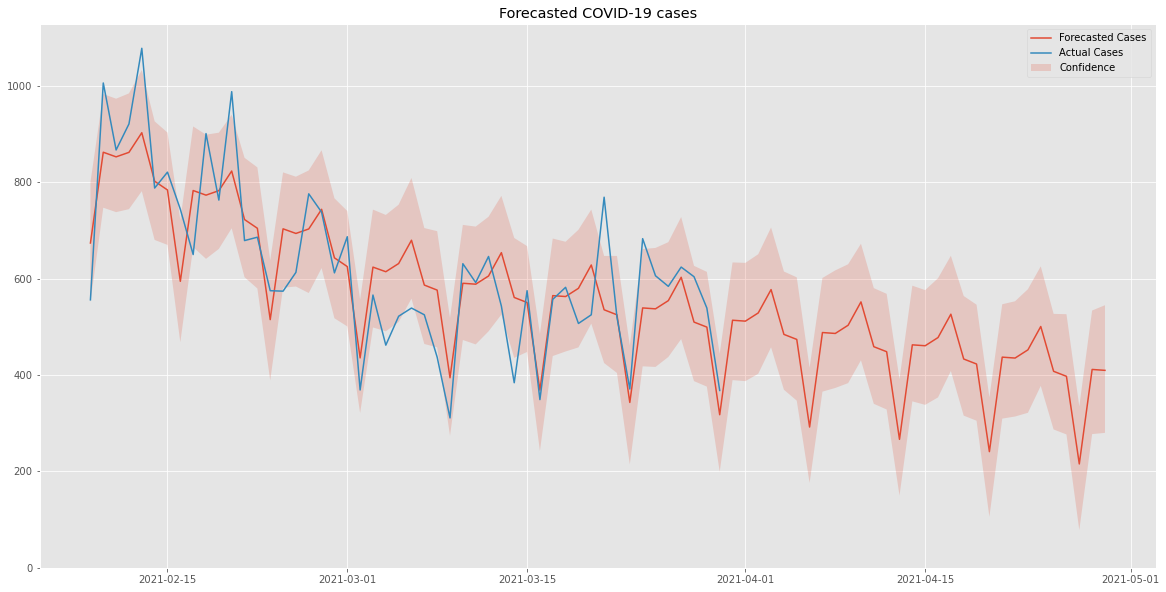

In [64]:
# COVID Data
DATA = "https://opendata.arcgis.com/datasets/d8eb52d56273413b84b0187a4e9117be_0.csv"

# Convert to Dataframe
full_df = pd.read_csv(DATA,
                usecols=['Date','ConfirmedCovidCases'],
                parse_dates=['Date'],
                encoding="ISO-8859-1",
                      dtype={"RegionName": str,
                        "CountryName":str}
                )

# Convert Dataframe to work with Prophet
df = full_df.rename(columns = {'Date':'ds', 'ConfirmedCovidCases':'y'})

# Remove Timezones
df['ds'] = df['ds'].dt.tz_convert(None)

# We are only interested in the last x days
df = df.tail(50)

# How Long to look into the future
forecast_length = 30

# instantiate and fit the model
m = Prophet()
m.fit(df)

# create the prediction dataframe 'forecast_length' days past the fit data
future = m.make_future_dataframe(periods=forecast_length)

# make the forecast to the end of the 'future' dataframe
forecast = m.predict(future)

# Data to Plot
to_plot = forecast[forecast.ds > '2021-02-01'].merge(df, how='left')

# Graph Properties
plt.figure(figsize = (20,10))
plt.plot(to_plot['ds'], to_plot['yhat'], label='Forecasted Cases')
plt.plot(to_plot['ds'], to_plot['y'], label='Actual Cases')
plt.fill_between(to_plot['ds'], to_plot['yhat_upper'], to_plot['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('Forecasted COVID-19 cases')
plt.legend()
plt.ylim(0)
plt.savefig('cases_forecast.png')
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


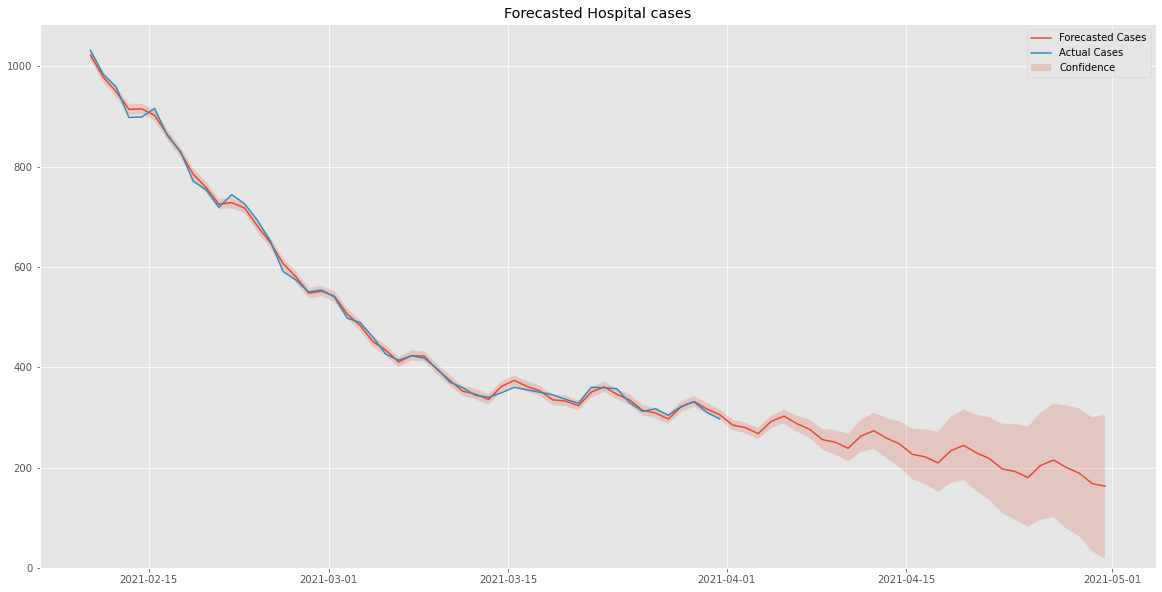

In [68]:
# Hospital URL
DATA = "https://opendata.arcgis.com/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0.csv"

# Convert to Dataframe
full_df = pd.read_csv(DATA,
                usecols=['Date','SUM_number_of_confirmed_covid_1'],
                parse_dates=['Date'],
                encoding="ISO-8859-1",
                      dtype={"RegionName": str,
                        "CountryName":str}
                )

# Convert Dataframe to work with Prophet
df = full_df.rename(columns = {'Date':'ds', 'SUM_number_of_confirmed_covid_1':'y'})

# Remove Timezones
df['ds'] = df['ds'].dt.tz_convert(None)

# We are only interested in the last x days
df = df.tail(50)

# How Long to look into the future
forecast_length = 30

# instantiate and fit the model
m = Prophet()
m.fit(df)

# create the prediction dataframe 'forecast_length' days past the fit data
future = m.make_future_dataframe(periods=forecast_length)

# make the forecast to the end of the 'future' dataframe
forecast = m.predict(future)

# Data to Plot
to_plot = forecast[forecast.ds > '2021-02-01'].merge(df, how='left')

# Graph Properties
plt.figure(figsize = (20,10))
plt.plot(to_plot['ds'], to_plot['yhat'], label='Forecasted Cases')
plt.plot(to_plot['ds'], to_plot['y'], label='Actual Cases')
plt.fill_between(to_plot['ds'], to_plot['yhat_upper'], to_plot['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('Forecasted Hospital cases')
plt.legend()
plt.ylim(0)
plt.savefig('hospital_forecast.png')
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


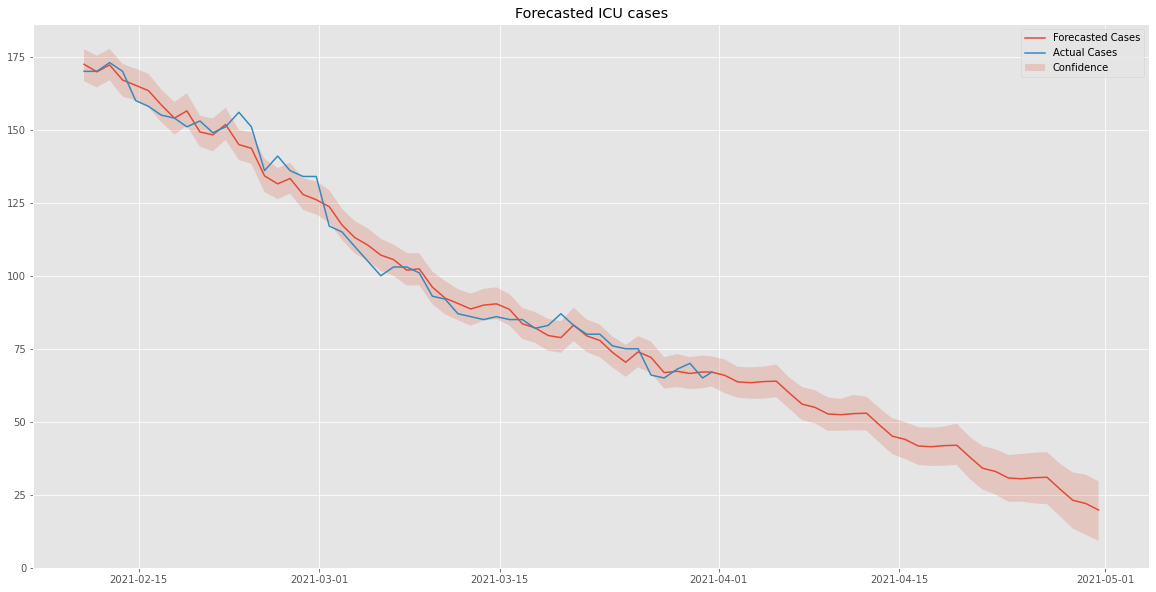

In [66]:
# ICU URL
DATA = "https://opendata.arcgis.com/datasets/c8208a0a8ff04a45b2922ae69e9b2206_0.csv"

# Convert to Dataframe
full_df = pd.read_csv(DATA,
                usecols=['extract','ncovidconf'],
                parse_dates=['extract'],
                encoding="ISO-8859-1",
                      dtype={"RegionName": str,
                        "CountryName":str}
                )

# Convert Dataframe to work with Prophet
df = full_df.rename(columns = {'extract':'ds', 'ncovidconf':'y'})

# Remove Timezones
df['ds'] = df['ds'].dt.tz_convert(None)

# We are only interested in the last x days
df = df.tail(50)

# How Long to look into the future
forecast_length = 30

# instantiate and fit the model
m = Prophet()
m.fit(df)

# create the prediction dataframe 'forecast_length' days past the fit data
future = m.make_future_dataframe(periods=forecast_length)

# make the forecast to the end of the 'future' dataframe
forecast = m.predict(future)

# Data to Plot
to_plot = forecast[forecast.ds > '2021-02-01'].merge(df, how='left')

# Graph Properties
plt.figure(figsize = (20,10))
plt.plot(to_plot['ds'], to_plot['yhat'], label='Forecasted Cases')
plt.plot(to_plot['ds'], to_plot['y'], label='Actual Cases')
plt.fill_between(to_plot['ds'], to_plot['yhat_upper'], to_plot['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('Forecasted ICU cases')
plt.legend()
plt.ylim(0)
plt.savefig('icu_forecast.png')
plt.show()